In [5]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/ARC_heuristic/PlotsPaper/')
print(os.getcwd())

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1b0U2fABpE8D898NvKTrvvqqusm1peAQH/ARC_heuristic/PlotsPaper


/tmp/ipykernel_334836/3518546769.py:52: RuntimeWarning: invalid value encountered in divide
  ACCerrA = np.sqrt(ACCerrA)/(nSeeds-1)


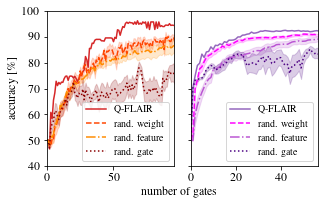

In [5]:
import numpy as np
import pylab as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.legend_handler import HandlerTuple

import matplotlib as mpl

mpl.rcParams.update({'text.usetex':True,'font.size': 12, 'font.family': 'serif', 'font.serif': ['Times', 'Computer Modern']})

color = ['tab:red','orange','tab:purple','green']
fig=plt.figure(figsize=(11.69*0.4,8.27*0.38))

# optimized gate
path_file = 'Data_QNN/logLossMN/ACC_test.txt'
ACC0 = np.genfromtxt(path_file,usecols=0,skip_header=1)
ACC1 = np.genfromtxt(path_file,usecols=1,skip_header=1)
ACC0 = np.array([0.5,*ACC0])
ACC1 = np.array([0.5,*ACC1])
ACCaverOpt = (ACC0+ACC1)*0.5
gatesOpt=np.linspace(0,len(ACCaverOpt)-1,len(ACCaverOpt))

# random angle
path = 'Data_QNN/logLossMN_randomAngle/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
maxDepth = 0
for i in range(0,10):
	files.append(path+f'ACC_test_10d_11552_{i+1}.txt')
	ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
	ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
	if len(ACC1[-1])>maxDepth: maxDepth = len(ACC1[-1])
	ACC0[-1] = np.array([0.5,*ACC0[-1]])
	ACC1[-1] = np.array([0.5,*ACC1[-1]])
	ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
ACCmeanA = np.zeros(maxDepth)
nSeeds = np.zeros(maxDepth)
for i in range(len(ACCmeanA)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCmeanA[i]+=ACCaver[j][i]
			nSeeds[i]+=1
ACCmeanA = ACCmeanA/nSeeds
#uncertainty of the mean ACCaver
ACCerrA = np.zeros(maxDepth)
for i in range(len(ACCerrA)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCerrA[i]+=(ACCaver[j][i]-ACCmeanA[i])**2
ACCerrA = np.sqrt(ACCerrA)/(nSeeds-1)


gatesA = np.linspace(0,len(ACCerrA)-1,len(ACCerrA))


# random feature
path = 'Data_QNN/logLossMN_randomFeature/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
maxDepth = 0
for i in range(0,10):
	#if i+1!=10:
		files.append(path+f'ACC_test_10d_11552_{i+1}.txt')
		ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
		ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
		if len(ACC1[-1])>maxDepth: maxDepth = len(ACC1[-1])
		ACC0[-1] = np.array([0.5,*ACC0[-1]])
		ACC1[-1] = np.array([0.5,*ACC1[-1]])
		ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
ACCmeanF = np.zeros(maxDepth)
nSeeds = np.zeros(maxDepth)
for i in range(len(ACCmeanF)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCmeanF[i]+=ACCaver[j][i]
			nSeeds[i]+=1
		else:
			ACCmeanF[i]+=ACCaver[j][-1]
			nSeeds[i]+=1
ACCmeanF = ACCmeanF/nSeeds
#uncertainty of the mean ACCaver
ACCerrF = np.zeros(maxDepth)
for i in range(len(ACCerrF)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCerrF[i]+=(ACCaver[j][i]-ACCmeanF[i])**2
ACCerrF = np.sqrt(ACCerrF)/(nSeeds-1)


gatesF = np.linspace(0,len(ACCerrF)-1,len(ACCerrF))



# random gate
path = 'Data_QNN/logLossMN_randomGate_contrib/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
for i in range(0,10):
		files.append(path+f'ACC_test_10d_11552_{i+1}.txt')
		ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
		ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
		ACC0[-1] = np.array([0.5,*ACC0[-1]])
		ACC1[-1] = np.array([0.5,*ACC1[-1]])
		ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
ACCmean = np.zeros(len(ACCaver[0]))
nSeeds = len(ACCaver)
nSeeds_inv = 1/nSeeds
for i in range(len(ACCmean)):
	for j in range(len(ACCaver)):
		ACCmean[i]+=ACCaver[j][i]*nSeeds_inv
#uncertainty of the mean ACCaver
ACCerr = np.zeros(len(ACCaver[0]))
for i in range(len(ACCerr)):
	for j in range(len(ACCaver)):
		ACCerr[i]+=(ACCaver[j][i]-ACCmean[i])**2
ACCerr = np.sqrt(ACCerr)/(nSeeds-1)


gates = np.linspace(0,len(ACCerr)-1,len(ACCerr))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

curve1, = ax2.plot(gatesOpt,ACCaverOpt*100,'-',color=color[2],label='Q-FLAIR',fillstyle='none')

curve5, = ax2.plot(gatesA,ACCmeanA*100,'--',color='magenta',label='rand. weight')
ax2.fill_between(gatesA,(ACCmeanA+ACCerrA)*100,(ACCmeanA-ACCerrA)*100,color='magenta',alpha=0.2)
curve5, = ax2.plot(gatesF,ACCmeanF*100,'-.',color='mediumorchid',label='rand. feature')
ax2.fill_between(gatesF,(ACCmeanF+ACCerrF)*100,(ACCmeanF-ACCerrF)*100,color='mediumorchid',alpha=0.2)
curve3, = ax2.plot(gates,ACCmean*100,':',color='indigo',label='rand. gate')
ax2.fill_between(gates,(ACCmean+ACCerr)*100,(ACCmean-ACCerr)*100,color='indigo',alpha=0.2)


# optimized gate
path_file = 'Data_QNN/logLossBS/ACC_test.txt'
ACC0 = np.genfromtxt(path_file,usecols=0,skip_header=1)
ACC1 = np.genfromtxt(path_file,usecols=1,skip_header=1)
ACC0 = np.array([0.5,*ACC0])
ACC1 = np.array([0.5,*ACC1])
ACCaverOpt = (ACC0+ACC1)*0.5
gatesOpt=np.linspace(0,len(ACCaverOpt)-1,len(ACCaverOpt))


# random angle
path = 'Data_QNN/logLossBS_randomAngle/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
maxDepth = 0
for i in range(0,9):
	#if i+1!=8:
		#files.append(path+f'ACC_test_seed{i+1}.txt')
		files.append(path+f'ACC_test_4d_1000_{i+1}.txt')
		ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
		ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
		if len(ACC1[-1])>maxDepth: maxDepth = len(ACC1[-1])
		ACC0[-1] = np.array([0.5,*ACC0[-1]])
		ACC1[-1] = np.array([0.5,*ACC1[-1]])
		ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
ACCmeanA = np.zeros(maxDepth)
nSeeds = np.zeros(maxDepth)

for i in range(len(ACCmeanA)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCmeanA[i]+=ACCaver[j][i]
			nSeeds[i]+=1
ACCmeanA = ACCmeanA/nSeeds


#uncertainty of the mean ACCaver
ACCerrA = np.zeros(maxDepth)
for i in range(len(ACCerrA)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCerrA[i]+=(ACCaver[j][i]-ACCmeanA[i])**2
ACCerrA = np.sqrt(ACCerrA)/(nSeeds-1)


gatesA = np.linspace(0,len(ACCerrA)-1,len(ACCerrA))


# random feature
path = 'Data_QNN/logLossBS_randomFeature/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
maxDepth = 0
for i in range(0,10):
	#if i+1!=8:
		#files.append(path+f'ACC_test_seed{i+1}.txt')
		files.append(path+f'ACC_test_4d_1000_{i+1}.txt')
		ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
		ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
		if len(ACC1[-1])>maxDepth: maxDepth = len(ACC1[-1])
		ACC0[-1] = np.array([0.5,*ACC0[-1]])
		ACC1[-1] = np.array([0.5,*ACC1[-1]])
		ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
ACCmeanF = np.zeros(maxDepth)
nSeeds = np.zeros(maxDepth)
for i in range(len(ACCmeanF)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCmeanF[i]+=ACCaver[j][i]#*nSeeds_inv
			nSeeds[i]+=1
		else:
			ACCmeanF[i]+=ACCaver[j][-1]
			nSeeds[i]+=1
ACCmeanF = ACCmeanF/nSeeds


#uncertainty of the mean ACCaver
ACCerrF = np.zeros(maxDepth)
for i in range(len(ACCerrF)):
	for j in range(len(ACCaver)):
		if i<len(ACCaver[j]):
			ACCerrF[i]+=(ACCaver[j][i]-ACCmeanF[i])**2
ACCerrF = np.sqrt(ACCerrF)/(nSeeds-1)


gatesF = np.linspace(0,len(ACCerrF)-1,len(ACCerrF))



# random gate
path = 'Data_QNN/logLossBS_randomGate_contrib/'
files = []
ACC0 = []
ACC1 = []
ACCaver = []
for i in range(0,10):
	if i!=7:
		files.append(path+f'ACC_test_4d_1000_{i+1}.txt')
		ACC0.append(np.genfromtxt(files[-1],usecols=0,skip_header=1))
		ACC1.append(np.genfromtxt(files[-1],usecols=1,skip_header=1))
		ACC0[-1] = np.array([0.5,*ACC0[-1]])
		ACC1[-1] = np.array([0.5,*ACC1[-1]])
		ACCaver.append((ACC0[-1]+ACC1[-1])*0.5)
#mean of the results of the different seeds
minLength=np.inf
for i in range(len(ACCaver)):
    if len(ACCaver[i])<minLength:
        minLength = len(ACCaver[i])

ACCmean = np.zeros(minLength)
nSeeds = len(ACCaver)
nSeeds_inv = 1/nSeeds


for i in range(minLength):
	for j in range(len(ACCaver)):
		ACCmean[i]+=ACCaver[j][i]*nSeeds_inv
#uncertainty of the mean ACCaver
ACCerr = np.zeros(minLength)
for i in range(minLength):
	for j in range(len(ACCaver)):
		ACCerr[i]+=(ACCaver[j][i]-ACCmean[i])**2
ACCerr = np.sqrt(ACCerr)/(nSeeds-1)


gates = np.linspace(0,len(ACCerr)-1,len(ACCerr))



curve2, = ax1.plot(gatesOpt,ACCaverOpt*100,'-',color=color[0],label='Q-FLAIR',fillstyle='none')

ACCmean_cut=[]
ACCerr_cut=[]
for i in range(len(gates)):
    if gates[i]<=max(gatesOpt):
        ACCmean_cut.append(ACCmean[i])
        ACCerr_cut.append(ACCerr[i])
ACCmean_cut=np.array(ACCmean_cut)
ACCerr_cut=np.array(ACCerr_cut)


gatesOpt=np.linspace(0,len(ACCmean_cut)-1,len(ACCmean_cut))

curve6, = ax1.plot(gatesA,ACCmeanA*100,'--',color='orangered',label='rand. weight',fillstyle='none')
ax1.fill_between(gatesA,(ACCmeanA+ACCerrA)*100,(ACCmeanA-ACCerrA)*100,color='orangered',alpha=0.2)
curve7, = ax1.plot(gatesF,ACCmeanF*100,'-.',color='darkorange',label='rand. feature',fillstyle='none')
ax1.fill_between(gatesF,(ACCmeanF+ACCerrF)*100,(ACCmeanF-ACCerrF)*100,color='darkorange',alpha=0.2)
curve4, = ax1.plot(gatesOpt,ACCmean_cut*100,':',color='darkred',label='rand. gate',fillstyle='none')
ax1.fill_between(gatesOpt,(ACCmean_cut+ACCerr_cut)*100,(ACCmean_cut-ACCerr_cut)*100,color='darkred',alpha=0.2)

ax1.set_ylim(0.4*100,1*100)
ax2.set_xlim(0,56+0.5)
ax2.set_ylim(0.4*100,1*100)
ax1.set_xlim(0,95+0.5)

ax1.legend(fontsize='small')
ax2.legend(fontsize='small')

ax2.tick_params(labelleft = False)

ax1.set_ylabel(r'accuracy [\%]',fontsize='medium')
fig.supxlabel('number of gates',y=0.1,x=0.55,fontsize='medium')

plt.tight_layout()
plt.savefig('Acc_randomGate_paper.pdf')
plt.show()